In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

### About this Dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

        Number of instances: 569

        Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

        Diagnosis (M = malignant, B = benign)


### Methods
This notebook trains a basic decision tree classifier for breast cancer prediction.
        It begins by splitting the data into training and testing sets, ensuring balanced class distribution.
        The data is then scaled using MinMaxScaler.

A basic decision tree model is trained and evaluated, achieving reasonable precision and recall. 


- Complete source for this project : https://github.com/PragyanTiwari/Breast-Cancer-Prediction-with-DecisionTree-Classifier



In [60]:
# reading the dataset
df = pd.read_csv(r"data/breast-cancer-wisconsin-data_data.csv")
df.drop(["id","Unnamed: 32"], axis=1, inplace=True)
print(f"shape: {df.shape}")
print(f"n_duplicates: {df.duplicated().sum()}")
print(f"null_values: {df.isnull().sum().sum()}")
df.head()

shape: (569, 31)
n_duplicates: 0
null_values: 0


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
features = df.drop("diagnosis", axis=1)
target = df['diagnosis']

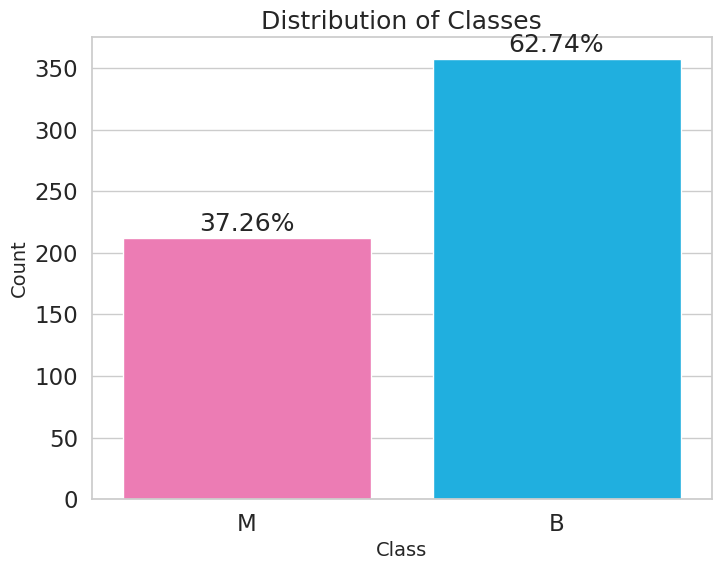

In [62]:
plt.figure(figsize=(8,6))

sns.countplot(x="diagnosis",
              data=df,
              palette=["#FF69B4", "#00BFFF"])
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()/len(df)*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Distribution of Classes", fontsize=18)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

<Figure size 500x500 with 0 Axes>

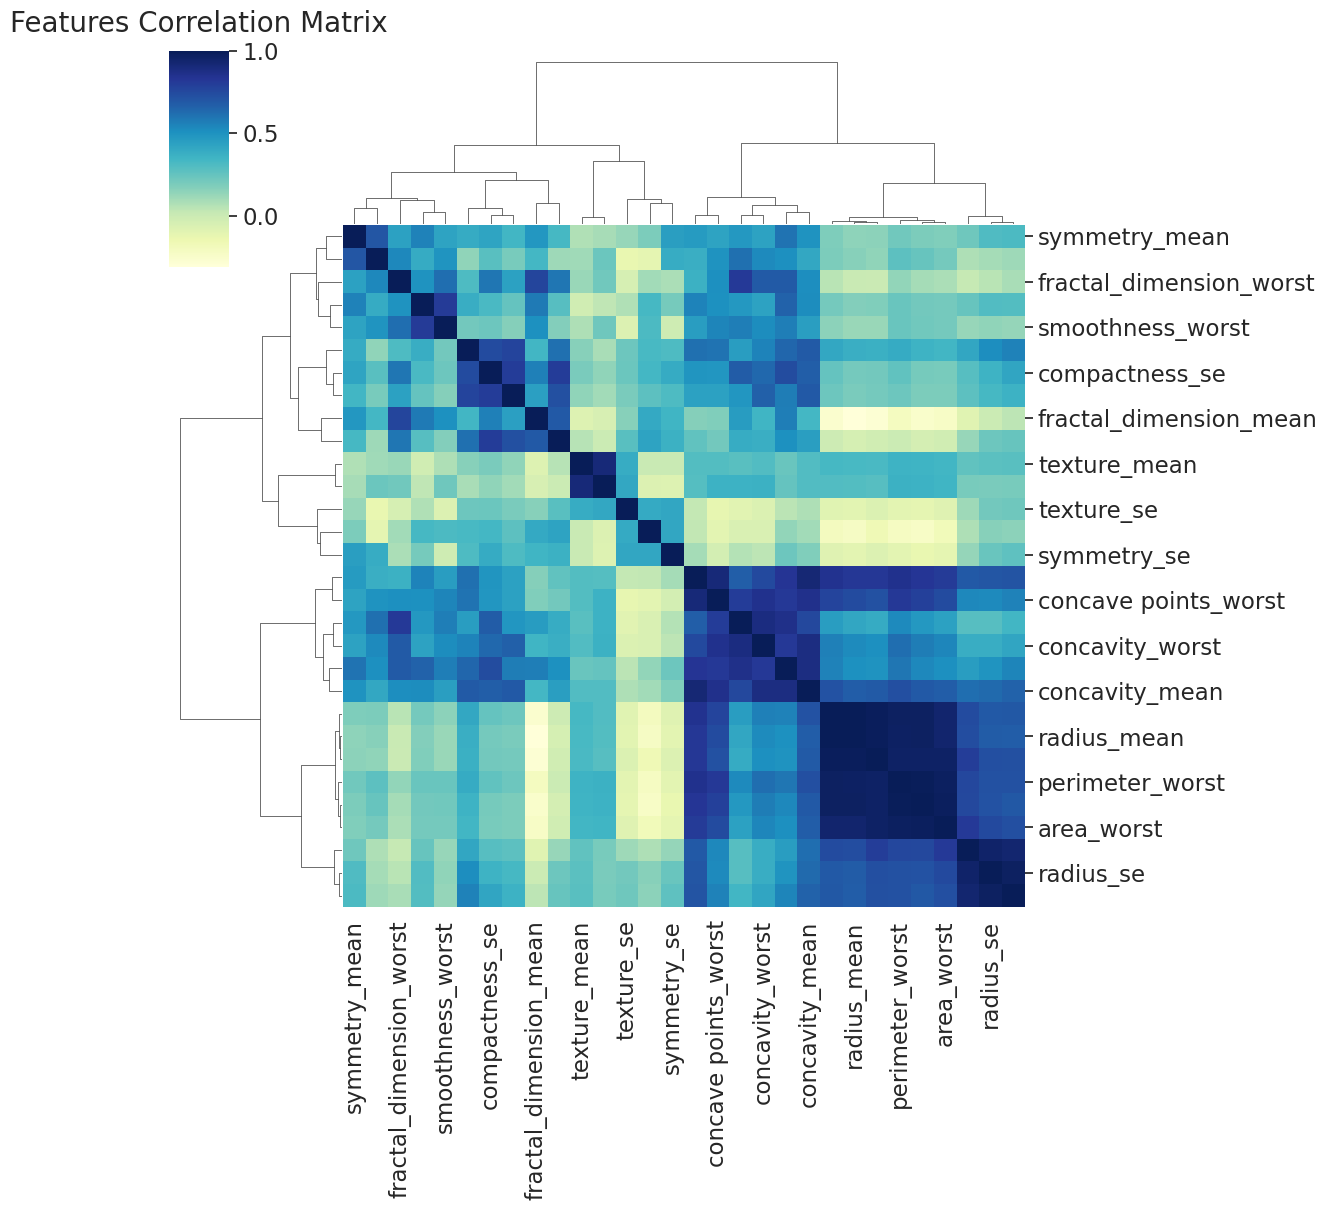

In [63]:
plt.figure(figsize=(5,5))
sns.clustermap(features.corr(), 
               cmap="YlGnBu", 
               figsize=(12,12), 
               method="ward",
               label="matrix")

plt.title("Features Correlation Matrix", y=1.05, fontsize=20, ha="center")
plt.show()

In [64]:
# importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [65]:
X = df.drop('diagnosis',axis=1)
Y = df['diagnosis']

# train test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,
                                                 test_size=0.2,
                                                 random_state=42)

print(f"(x_train: {x_train.shape}, y_train: {y_train.shape})")
print(f"(x_test: {x_test.shape}, y_test: {y_test.shape})")

(x_train: (455, 30), y_train: (455,))
(x_test: (114, 30), y_test: (114,))


In [66]:
# scaling down the dataset using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train,y_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

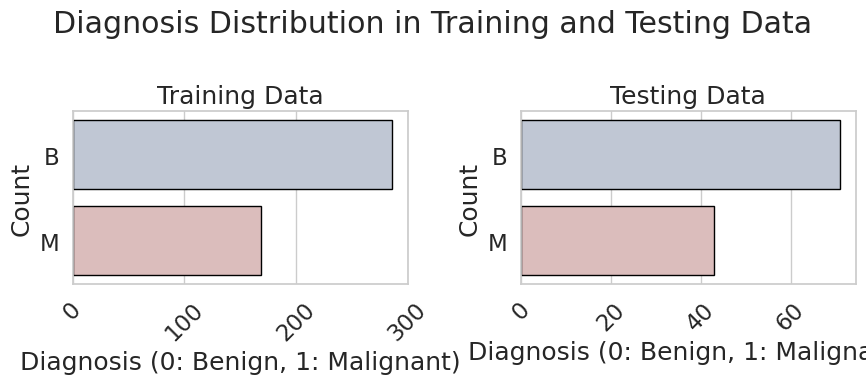

In [67]:
# Visualing distribution of class across the split

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Plot distribution of y_train
sns.countplot(y_train, ax=axes[0], palette="vlag", edgecolor="black")
axes[0].set_title("Training Data")
axes[0].set_xlabel("Diagnosis (0: Benign, 1: Malignant)")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Plot distribution of y_test
sns.countplot(y_test, ax=axes[1], palette="vlag", edgecolor="black")
axes[1].set_title("Testing Data")
axes[1].set_xlabel("Diagnosis (0: Benign, 1: Malignant)")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)


fig.suptitle("Diagnosis Distribution in Training and Testing Data")
plt.tight_layout()
plt.show()

In [68]:
# building a basic model

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)


y_pred = clf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.93      0.99      0.96        71
           M       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



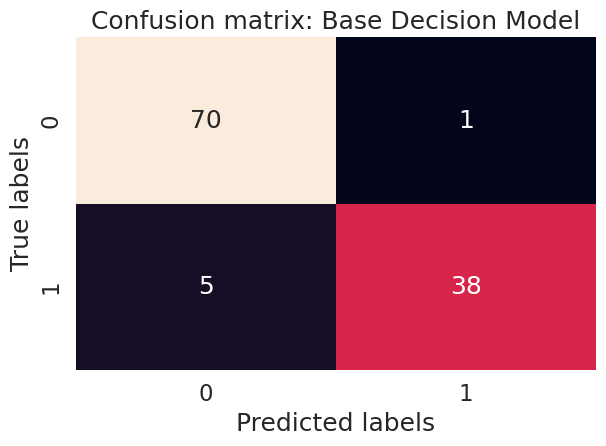

In [69]:
# plotting confusion matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix: Base Decision Model')
plt.tight_layout()
plt.show()

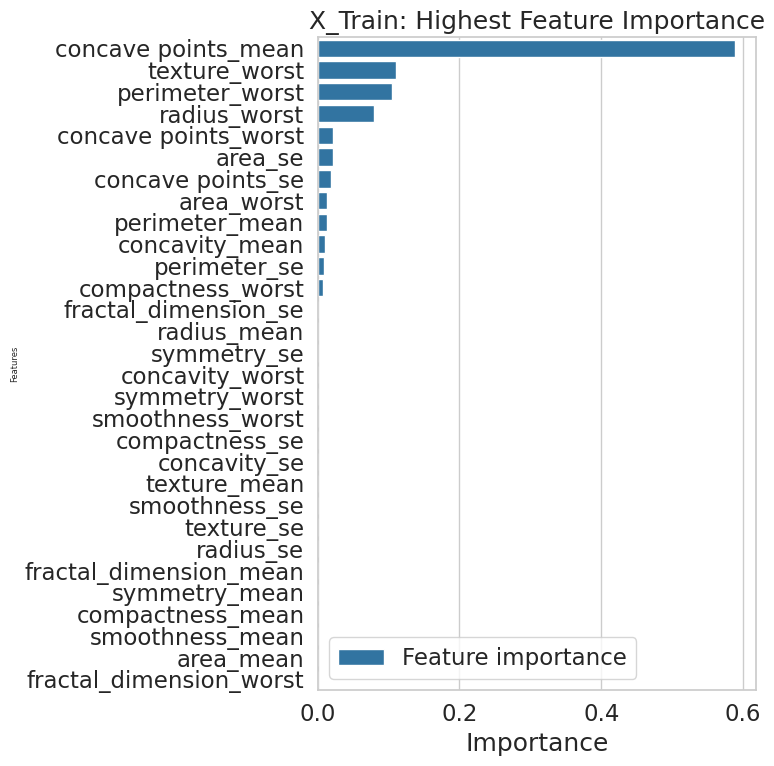

In [70]:
# Exploring Feature Importance

feature_imp = {'features':X.columns,
               'importance':clf.feature_importances_}

feature_imp_df = pd.DataFrame(feature_imp)
sorted_feature_imp= feature_imp_df.sort_values(by="importance", 
                                               ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(data=sorted_feature_imp, x="importance", y="features",
            label="Feature importance",legend=True)   
plt.title("X_Train: Highest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features", fontsize=6)
plt.tight_layout()
plt.show()

In [71]:
features.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

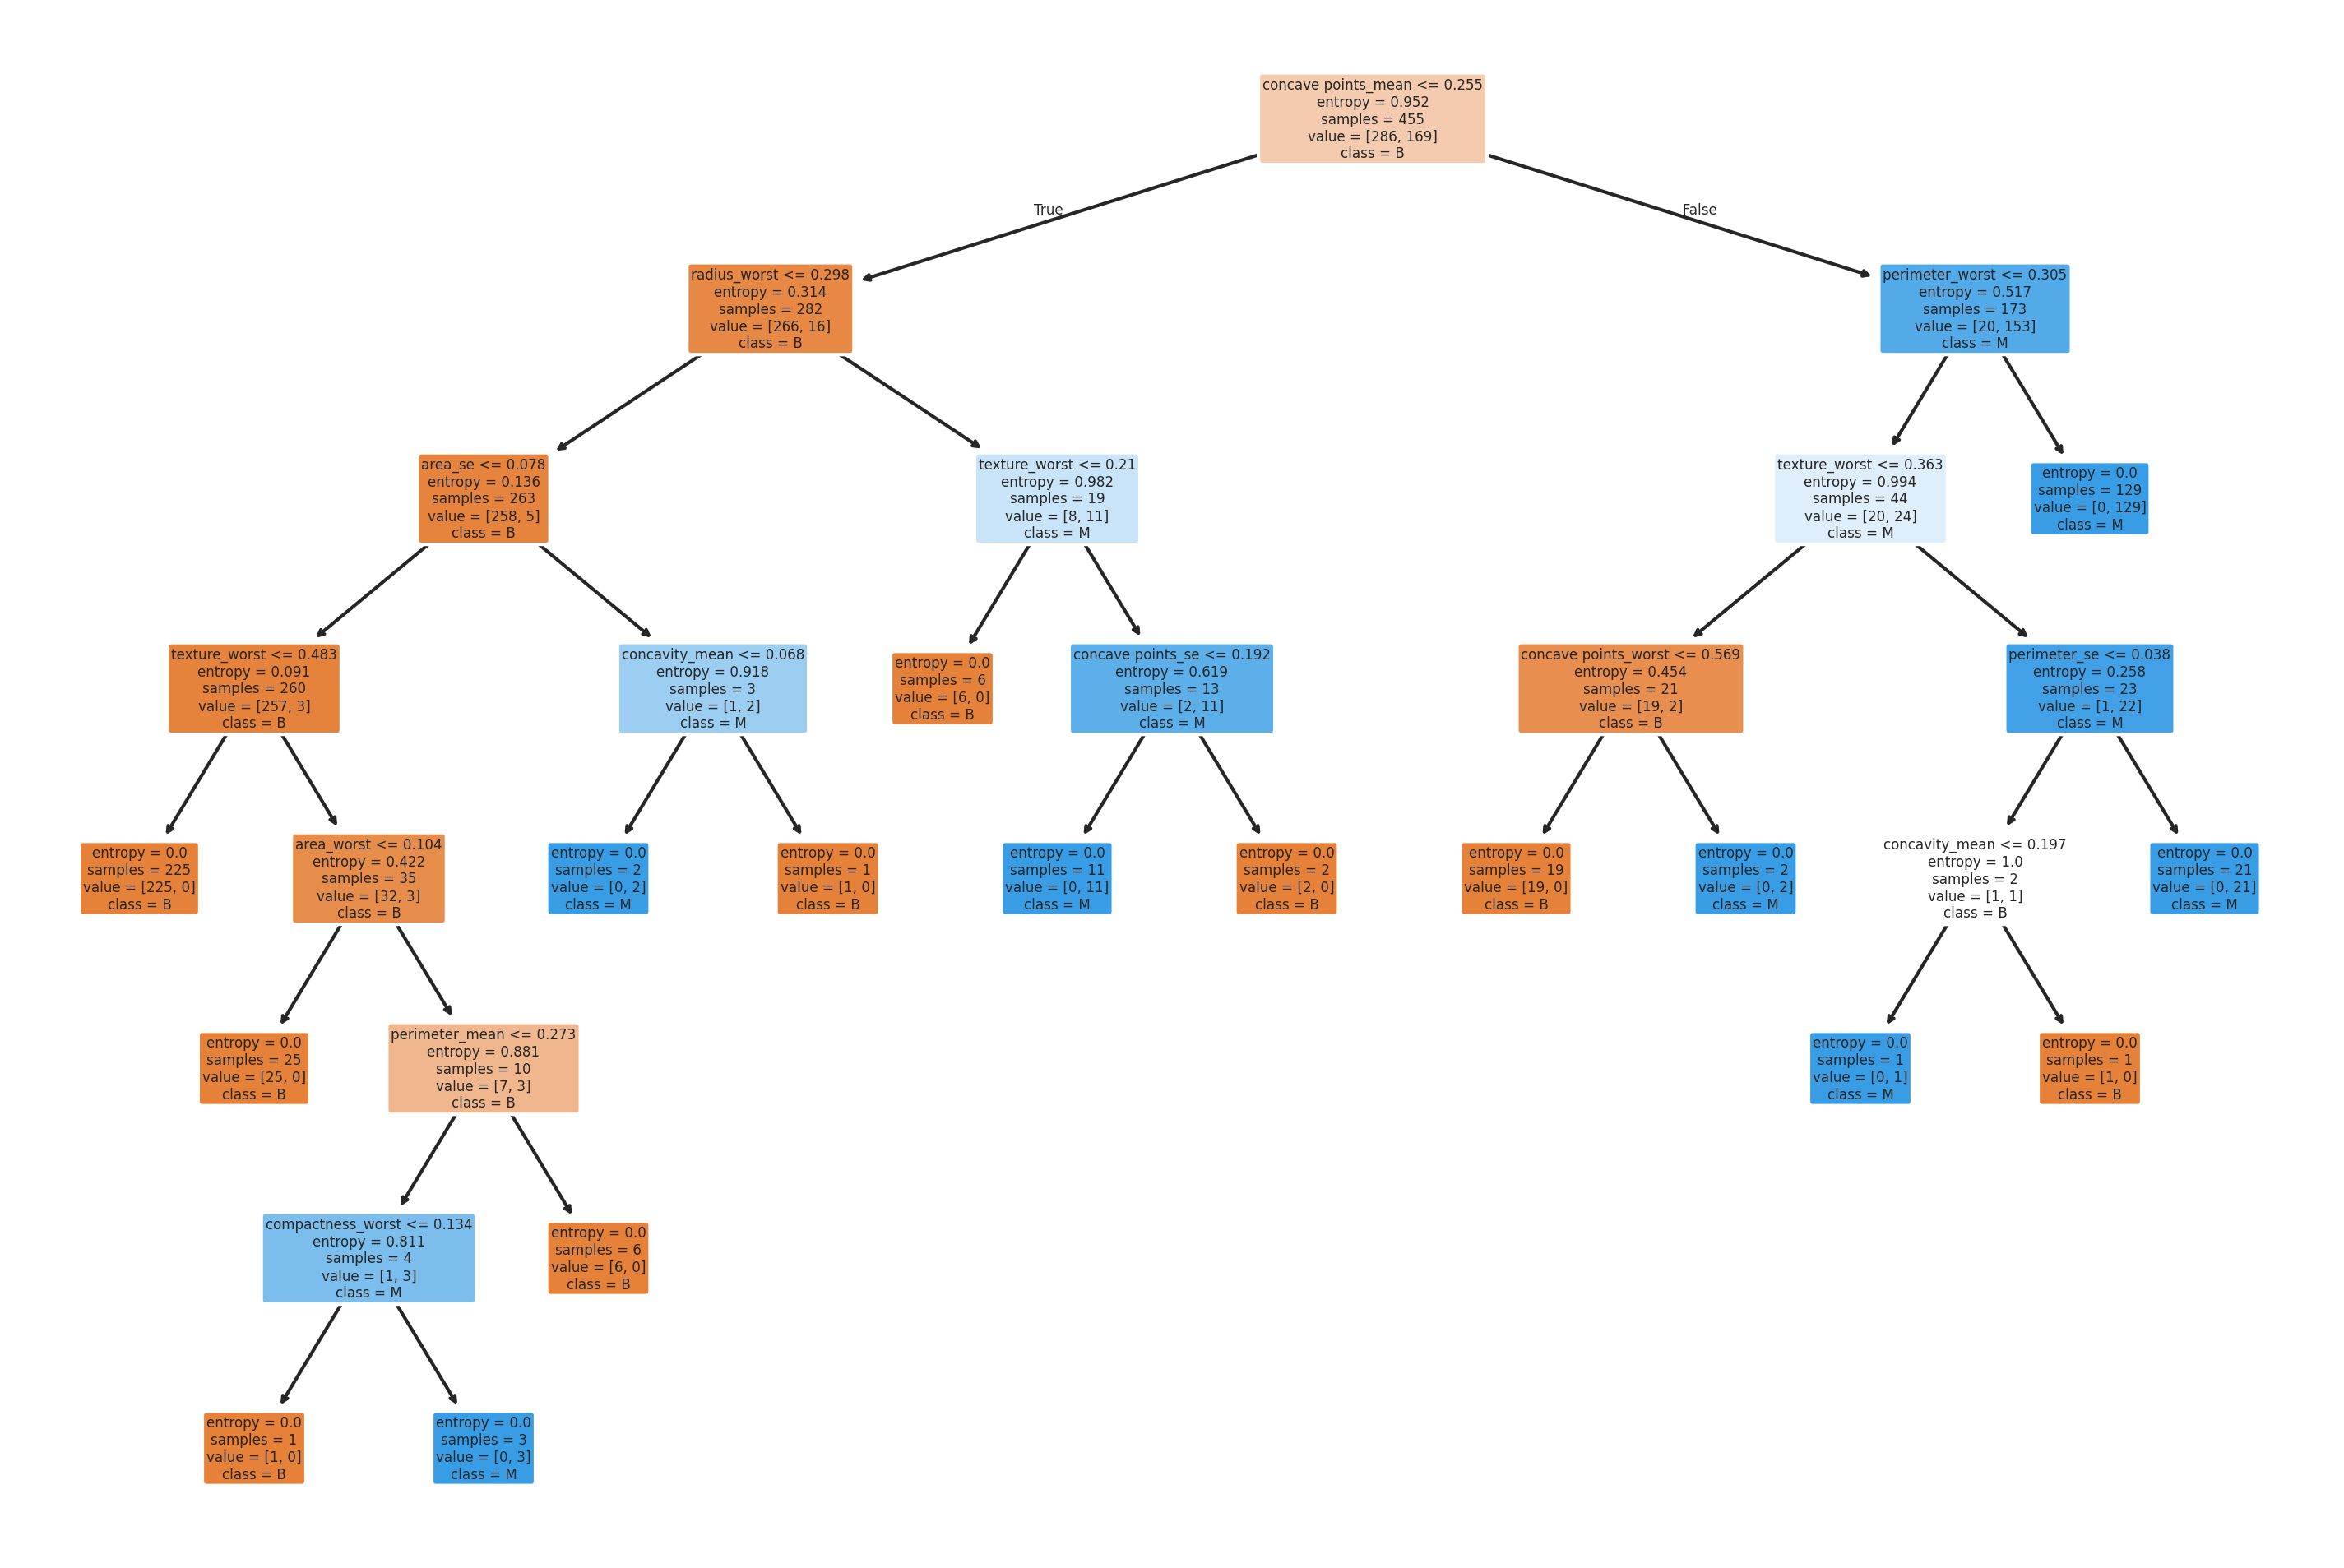

In [72]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(12, 8), dpi=300)  # Augmente la résolution
plot_tree(clf, feature_names=features.columns, class_names=y_train.unique(), filled=True, rounded=True)
# Sauvegarder l'image en haute qualité
plt.savefig("issues/CART_breast_cancer_basicTraining.png", dpi=300, bbox_inches="tight")
plt.show()

In [73]:
n_least_imp_features = len(feature_imp_df.query("importance <= 0"))
print(f"total features having 0 importance: {n_least_imp_features}")

total features having 0 importance: 18


Atmost, 18 features are not significantly impacting the model. Instead of removing them, we'll apply PCA to create new features with reduced dimensions, preserving relevant information.

### Perspective : 
        Instead of discarding these features with 0 importance, w'll gona prepares the data for dimensionality reduction using PCA in a later step.
        The training and testing sets (including features with and without importance) are saved for subsequent processing.